<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

**Atividade**: Análise de regressão das variáveis de Número Diário de Casos (NDC) e Número Diário de Testes (NDT)

**Descrição da atividade**: Realizar a análise de regressão entre as variáveis NDC e NDT para a investigação da correlação entre essas variáveis nos países considerados neste trabalho.

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_owd = pd.read_csv('../1_conjunto_de_dados/dataset/data/blueteam_international_update_2020_06_03.csv')
data_owd['date'] = pd.to_datetime(data_owd['date'])
data_owd = data_owd[data_owd['date'] >= '2020-04-01']

data_owd = data_owd[~data_owd['new_tests'].isna()] # Filtrando o conjunto de dados pelos testes válidos
data_owd = data_owd[~data_owd['new_cases'].isna()]

In [3]:
data_owd.set_index("iso_code", inplace=True)

**Gerando as regressões**

In [4]:
codes = ['CAN', 'MEX', 'CUB', 'RUS']

names = {
    'CAN': 'Canadá',
    'BRA': 'Brasil',
    'CUB': 'Cuba',
    'MEX': 'México',
    'RUS': 'Rússia'    
}

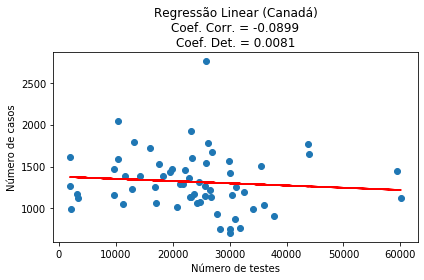

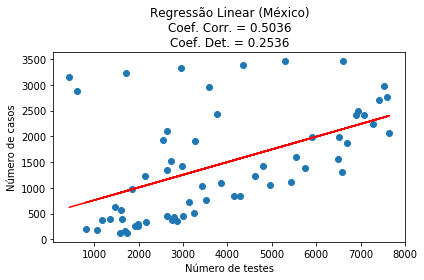

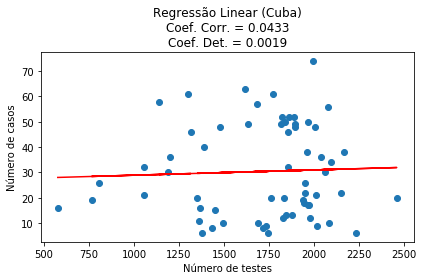

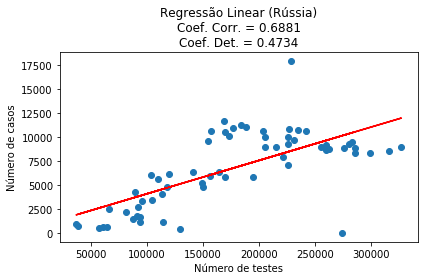

In [5]:
for c in codes:
    data = data_owd.loc[[c], :]
    
    # linear regression model
    X = data['new_tests'].values.reshape(-1, 1)
    y = data['new_cases'].values.reshape(-1, 1)
    
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    y_pred = regr.predict(X)
    
    # Métricas
    co = np.corrcoef(data['new_tests'], data['new_cases'])
    co_value = co[0][1]
    r2 = r2_score(y, y_pred)
    
    country_name = names[c]
    
    plt.figure()
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.title('Linear Regression ({0})'.format(c))
    plt.title('Regressão Linear ({country})\nCoef. Corr. = {co_value}\nCoef. Det. = {r2}'.format(country=country_name, co_value=round(co_value, 4), r2=round(r2, 4)))
    plt.ylabel("Número de casos")
    plt.xlabel("Número de testes")
    plt.tight_layout()
    plt.show()